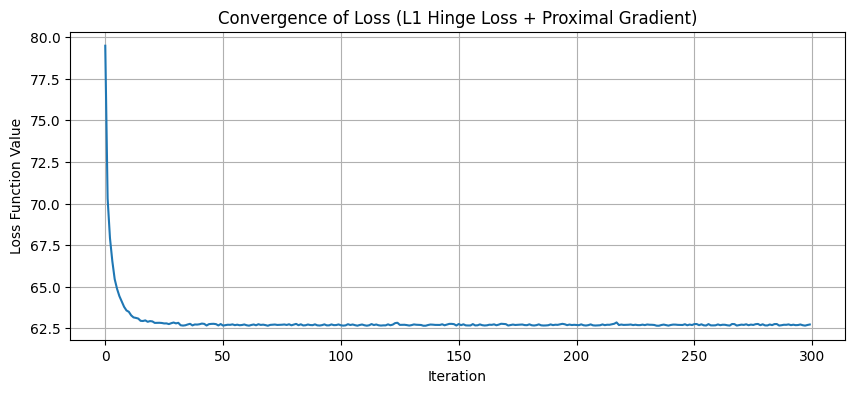

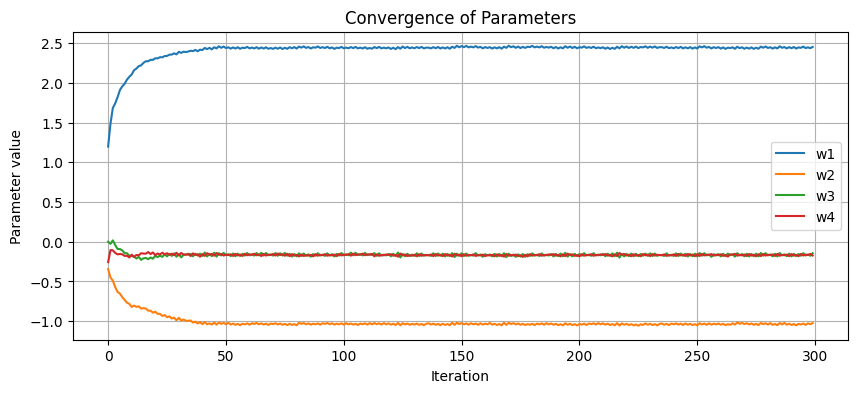

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# データセットIVの生成
np.random.seed(0)
n, d = 200, 4
x = 3 * (np.random.rand(n, d) - 0.5)
y = (2 * x[:, 0] - x[:, 1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y = 2 * y.astype(int) - 1  # {+1, -1}

# ハイパーパラメータ
lambda_ = 1.0
eta = 0.01
max_iter = 300

# 初期化
w = np.zeros(d)
losses = []
w_list = []

# ヒンジ損失 + L1正則化
def hinge_loss(w, x, y, lambda_):
    margin = 1 - y * (x @ w)
    hinge = np.maximum(0, margin)
    return np.sum(hinge) + lambda_ * np.sum(np.abs(w))

# ヒンジ損失の劣勾配
def subgradient(w, x, y, lambda_):
    margin = y * (x @ w)
    mask = margin < 1
    grad = -np.sum((y[mask, None] * x[mask]), axis=0)
    grad += lambda_ * np.sign(w)
    return grad

# ソフトスレッショルディング
def soft_thresholding(w, thresh):
    return np.sign(w) * np.maximum(np.abs(w) - thresh, 0)

# PG法ループ
for t in range(max_iter):
    # ヒンジ部分の勾配（λ項はprox側で処理）
    margin = y * (x @ w)
    grad = -np.sum((y[margin < 1, None] * x[margin < 1]), axis=0)

    # 勾配ステップ
    w_temp = w - eta * grad

    # 近接ステップ（L1正則化）
    w = soft_thresholding(w_temp, eta * lambda_)

    # ログ
    losses.append(hinge_loss(w, x, y, lambda_))
    w_list.append(w.copy())

# プロット：損失関数の推移
plt.figure(figsize=(10, 4))
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss Function Value")
plt.title("Convergence of Loss (L1 Hinge Loss + Proximal Gradient)")
plt.grid()
plt.show()

# プロット：パラメータの推移
w_array = np.array(w_list)
plt.figure(figsize=(10, 4))
for i in range(d):
    plt.plot(w_array[:, i], label=f"w{i+1}")
plt.xlabel("Iteration")
plt.ylabel("Parameter value")
plt.title("Convergence of Parameters")
plt.legend()
plt.grid()
plt.show()
